In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import datasets 


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [4]:
L, W, H = X_train.shape

In [5]:
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
Y_train = np_utils.to_categorical(y_train)  #one hot encoding
Y_test = np_utils.to_categorical(y_test) 

In [10]:
Y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
model = keras.models.Sequential()

In [12]:
model.add(keras.layers.Dense(100, activation='relu', input_shape=(W * H,), name='Hidden_layer_1'))
model.add(keras.layers.Dense(50, activation='relu', name='Hidden_layer_2'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 48us/step - loss: 0.4674 - acc: 0.8649 - val_loss: 0.1895 - val_acc: 0.9458
Epoch 2/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.2013 - acc: 0.9413 - val_loss: 0.1379 - val_acc: 0.9588
Epoch 3/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1445 - acc: 0.9580 - val_loss: 0.1104 - val_acc: 0.9683
Epoch 4/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1158 - acc: 0.9658 - val_loss: 0.1056 - val_acc: 0.9693
Epoch 5/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.0937 - acc: 0.9718 - val_loss: 0.0973 - val_acc: 0.9718


In [14]:
performace_test = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 32us/step


In [15]:
performace_test

[0.09578789866873995, 0.9714]

In [16]:
# 한글 설정
import matplotlib
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

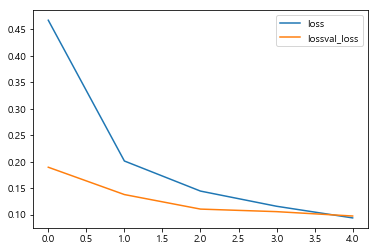

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='lossval_loss')
plt.legend()


In [18]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [19]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)